In [ ]:
!pip install numpy
!pip install pandas
!pip install scikit-learn

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import pickle
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [ ]:
covid = pd.read_csv(r"sample_data/covid_19_data.csv",encoding= 'unicode_escape')

In [ ]:
covid["ObservationDate"] = pd.to_datetime(covid["ObservationDate"])

In [ ]:
cols = ['SNo', 'Province/State', 'Country/Region', 'Last Update', 'Confirmed', 'Deaths']
covid.drop(cols, axis=1, inplace=True)

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60963 entries, 0 to 60962
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ObservationDate  60963 non-null  datetime64[ns]
 1   Recovered        60962 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 952.7 KB


In [ ]:
coviddata=covid.groupby(pd.Grouper(key='ObservationDate',freq='d'))["Recovered"].sum().reset_index()

In [ ]:
coviddata=coviddata.set_index('ObservationDate')

In [ ]:
coviddata
covid=coviddata

In [ ]:
covid.shape


(170, 1)

In [ ]:
# Numero de registros del dataset
print("Cantidad de registros:",len(covid))
# Cantidad de columnas del dataset
print("Cantidad de columnas:",len(covid.columns))
# Tipos de datos del dataset
print("Tipo de datos:",covid.dtypes.unique())
# Tamaño del daset
print("Filas y columnas:",covid.shape)

Cantidad de registros: 170
Cantidad de columnas: 1
Tipo de datos: [dtype('float64')]
Filas y columnas: (170, 1)


In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 170 entries, 2020-01-22 to 2020-07-09
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recovered  170 non-null    float64
dtypes: float64(1)
memory usage: 2.7 KB


In [ ]:
covid = covid.sort_values('ObservationDate')
covid.isnull().sum()

Recovered    0
dtype: int64

In [ ]:
#Cantidad de datos perdidos por columna en los datos
datosPerdidos = (covid.isnull().sum())
print(datosPerdidos[datosPerdidos > 0])

Series([], dtype: int64)


In [ ]:
covid

Recovered
ObservationDate           
2020-01-22            30.0
2020-01-23            60.0
2020-01-24            39.0
2020-01-25            42.0
2020-01-26            56.0
...                    ...
2020-07-05       6178403.0
2020-07-06       6302110.0
2020-07-07       6447148.0
2020-07-08       6605164.0
2020-07-09       6225601.0

[170 rows x 1 columns]

In [ ]:
covid = covid.groupby('ObservationDate')['Recovered'].sum().reset_index()

In [ ]:
covid

ObservationDate  Recovered
0        2020-01-22       30.0
1        2020-01-23       60.0
2        2020-01-24       39.0
3        2020-01-25       42.0
4        2020-01-26       56.0
..              ...        ...
165      2020-07-05  6178403.0
166      2020-07-06  6302110.0
167      2020-07-07  6447148.0
168      2020-07-08  6605164.0
169      2020-07-09  6225601.0

[170 rows x 2 columns]

In [ ]:
covid = covid.drop(covid.loc[covid['Recovered']==0.0].index, inplace=True)

In [ ]:
covid

In [ ]:
covid=coviddata

In [ ]:
y = covid['Recovered'].resample('W').mean()
y.plot(figsize=(15, 6))
plt.show()

In [ ]:
y = covid['Recovered']

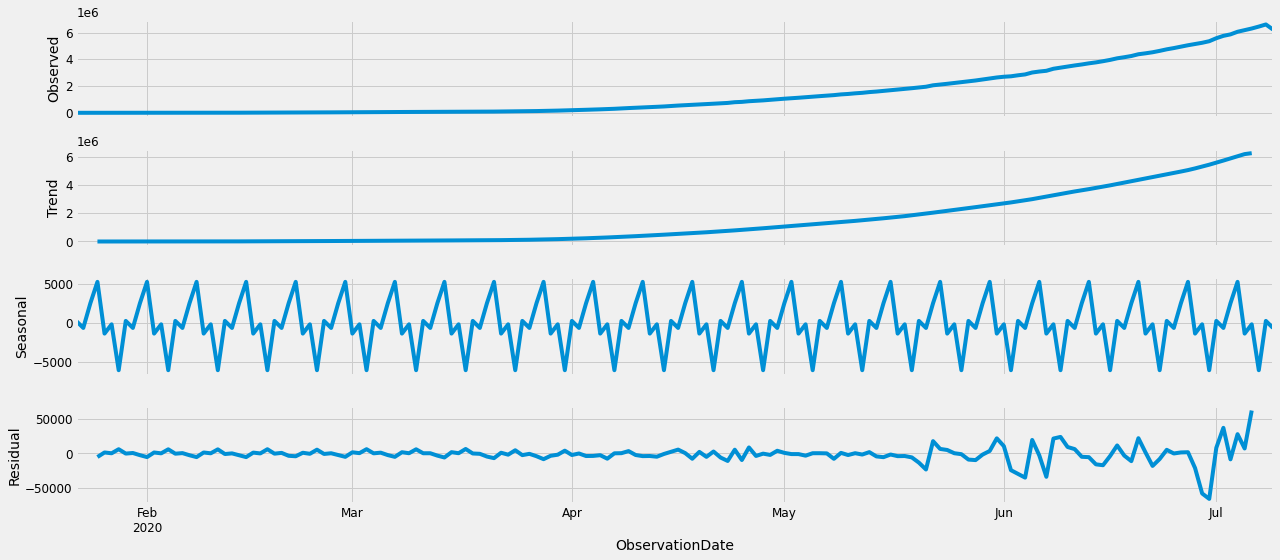

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
p = d = q = range(2,6)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 30) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (2, 2, 3) x (2, 2, 3, 30)
SARIMAX: (2, 2, 3) x (2, 2, 4, 30)
SARIMAX: (2, 2, 4) x (2, 2, 5, 30)
SARIMAX: (2, 2, 4) x (2, 3, 2, 30)


In [ ]:
for param in pdq:
    #for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            #seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
#print(results.summary().tables[1])
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                
Dep. Variable:                         Recovered   No. Observations:                  170
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -1851.647
Date:                           Sat, 02 Oct 2021   AIC                           3713.294
Time:                                   05:32:26   BIC                           3728.446
Sample:                               01-22-2020   HQIC                          3719.449
                                    - 07-09-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0058      0.031     32.964      0.000       0.946       1.066
ma.L1         -0.9721      0.114     -8.505

##Evaluación
El set de datos es bueno. Sin embargo, la cantidad de datos no suficiente. No obstante, se redujeron los rangos de prección de meses a semanas, para una mejor precisión.
El modelo puede ser usado para predecir la cantidad de pacientes recuperados de Covid-19. Todo esto, con los steps, los cuales me indican los rangos de predicción.

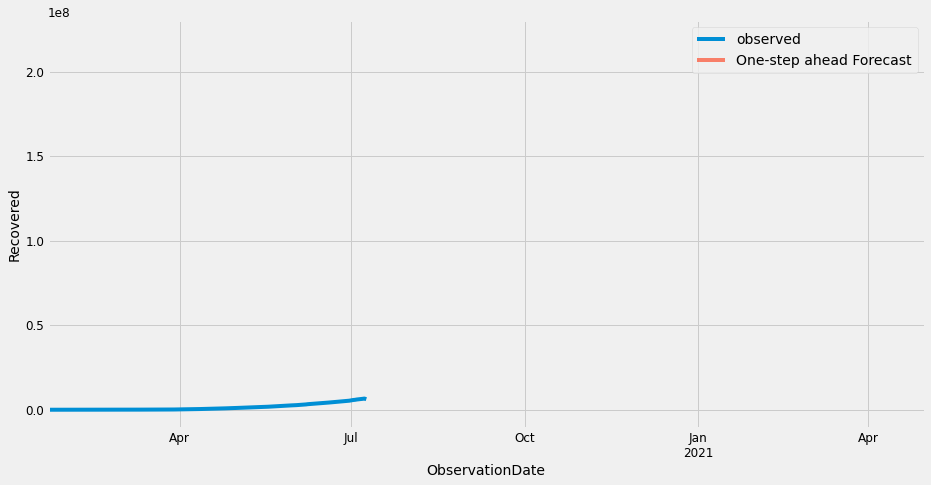

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2021-05-01'), dynamic=False)#2017-05-12
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('ObservationDate')
ax.set_ylabel('Recovered')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2021-05-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is nan


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is nan


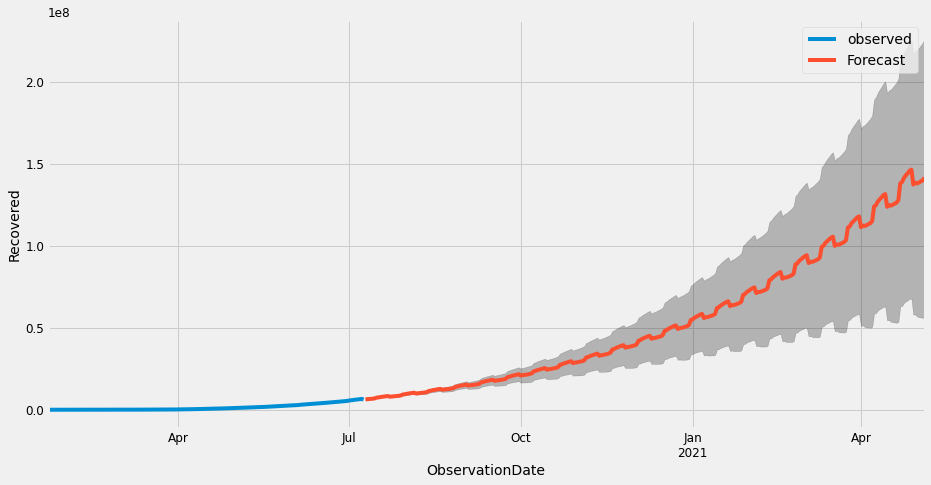

In [ ]:
pred_uc = results.get_forecast(steps=300)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('ObservationDate')
ax.set_ylabel('Recovered')
plt.legend()
plt.show()

In [ ]:
pred_ci

lower Recovered  upper Recovered
2020-07-10     6.257865e+06     6.442542e+06
2020-07-11     6.303940e+06     6.569547e+06
2020-07-12     6.358777e+06     6.689555e+06
2020-07-13     6.435745e+06     6.824077e+06
2020-07-14     6.524637e+06     6.966002e+06
...                     ...              ...
2021-05-01     5.696129e+07     2.194460e+08
2021-05-02     5.658825e+07     2.208810e+08
2021-05-03     5.640760e+07     2.225250e+08
2021-05-04     5.608626e+07     2.240450e+08
2021-05-05     5.680355e+07     2.266204e+08

[300 rows x 2 columns]

In [ ]:
import pickle
filename = 'PacientesCovid'
pickle.dump(results, open(filename, 'wb'))

In [ ]:
import pandas as pd # Librería de tratamiento de datos

import pickle
# load the model from disk
loaded_model = pickle.load(open("/content/PacientesCovid", 'rb'))
a = loaded_model.get_forecast(steps=300)
a.predicted_mean

2020-07-10    6.350204e+06
2020-07-11    6.436744e+06
2020-07-12    6.524166e+06
2020-07-13    6.629911e+06
2020-07-14    6.745320e+06
                  ...     
2021-05-01    1.382037e+08
2021-05-02    1.387346e+08
2021-05-03    1.394663e+08
2021-05-04    1.400656e+08
2021-05-05    1.417120e+08
Freq: D, Length: 300, dtype: float64